In [28]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")


print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-disease-dataset


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import seaborn as sns

# Data Overview

In [30]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [31]:
df.shape

(1025, 14)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


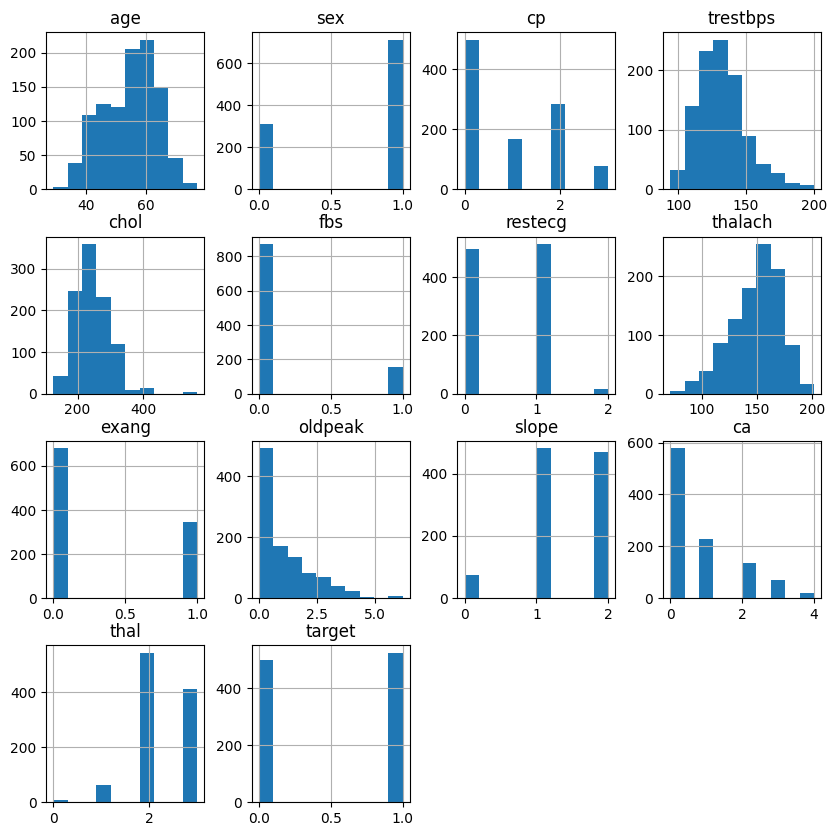

In [33]:
df.hist(figsize=(10,10))
plt.show()

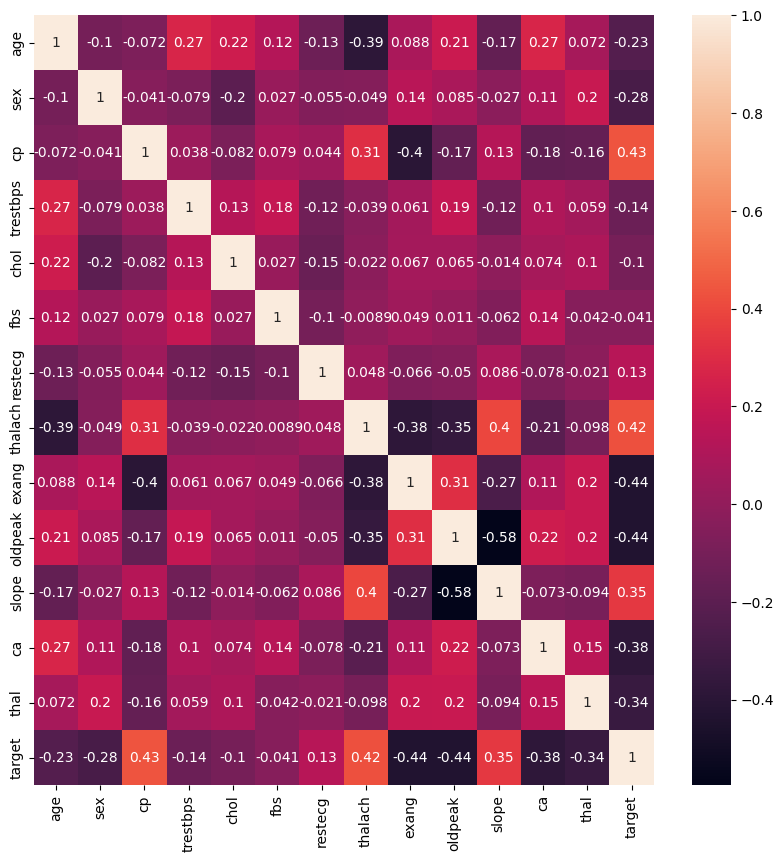

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Train-Test Split

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

# Models

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
models= {
    'logistic regression': LogisticRegression(max_iter=1000, random_state=42),
    'naive bayes': GaussianNB(),
    'SVM':SVC(probability=True, kernel='rbf', C=1.0, random_state=42),
    'decision tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    }

# Model Evaluation

In [40]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{model_name} accuracy: {model.score(X_test, y_test)}')

logistic regression accuracy: 0.7951219512195122
naive bayes accuracy: 0.8
SVM accuracy: 0.6829268292682927
decision tree accuracy: 0.8439024390243902
RandomForest accuracy: 0.8731707317073171


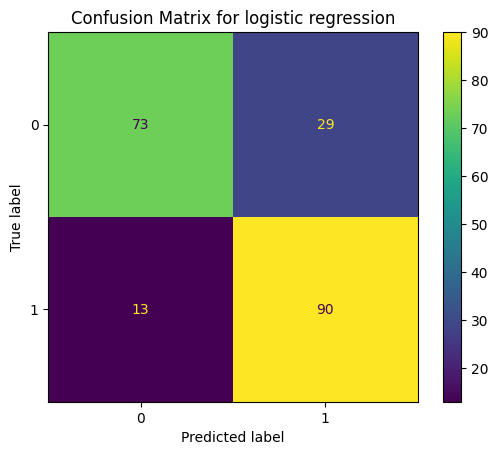

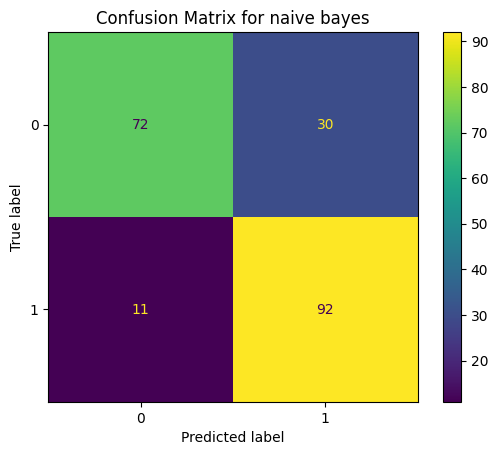

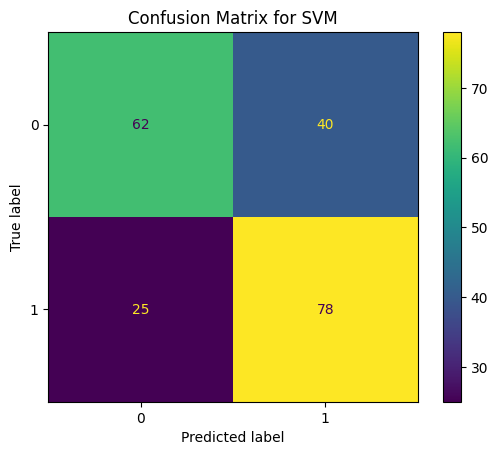

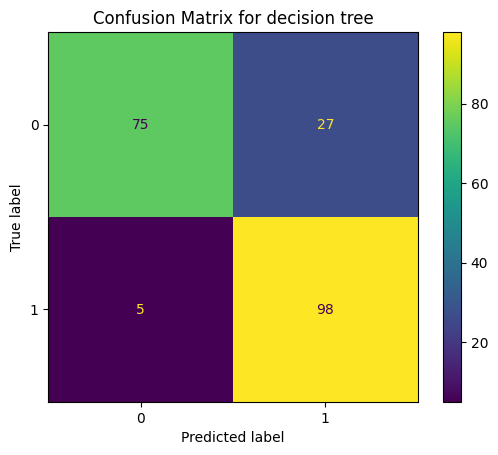

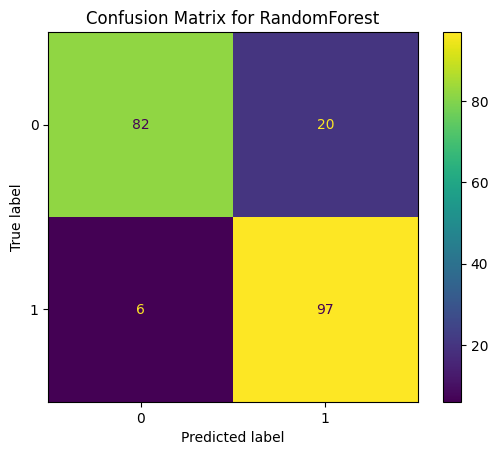

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()